### 1. Создаем первую квантовую схему

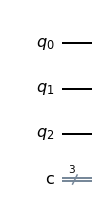

In [2]:
from qiskit import QuantumCircuit

# Create quantum circuit with 3 qubits and 3 classical bits \ Создаем квантовую схему с 3-мя кубитами и 3-мяклассическими битами
# (we'll explain why we need the classical bits later) \ обьясним позже, зачем нужны классические биты
qc = QuantumCircuit(3, 3)
qc.draw('mpl')  # returns a drawing of the circuit \ запрос возвращает рисунок схемы

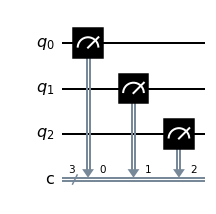

In [5]:
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively \ измерять кубиты 0, 1 и 2 до классических битов 0, 1 и 2 соответственно
qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

In [6]:
# Let's import Qiskit’s simulator (called Aer), and make a new simulator object \ Давайте импортируем симулятор Qiskit (называемый Aer) и создадим новый объект симулятора
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

###### To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts" 

###### Чтобы получить результаты работы, мы используем метод результатов, и самый популярный способ просмотра результатов — это словарь «счетчиков».

In [7]:
job = sim.run(qc)      # run the experiment \ запустить эксперимент
result = job.result()  # get the results \ получить результаты
result.get_counts()    # interpret the results as a "counts" dictionary \ интерпретировать как словарь {'результат измерений': число измерений}

{'000': 1024}

###### By convention, qubits always start in the state 0, and since we are doing nothing to them before measurement, the results are always 0

###### По соглашению кубиты всегда начинаются в состоянии 0, и, поскольку мы ничего с ними не делаем перед измерением, результаты всегда равны 0

### 1.  Оператор NOT или X-gate 

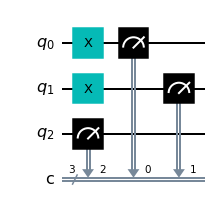

In [9]:
# Create quantum circuit with 3 qubits and 3 classical bits: \ оздаем квантовую схему с 3-мя кубитами и 3-мяклассическими битами
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1 \ Применяем X-гейты на кубитах 0 и 1
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')    # returns a drawing of the circuit

In [10]:
job = sim.run(qc)      # run the experiment \ запустить эксперимент    
result = job.result()  # get the results \ получить результаты
result.get_counts()    

{'011': 1024}

### 2.  Оператор CNOT

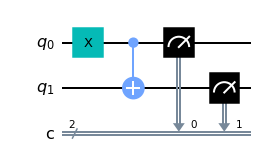

Result:  {'11': 1024}


In [7]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1) # CNOT controlled by qubit 0 and targeting qubit 1 \ CNOT контролируется кубитом 0 и нацелена на кубит 1
qc.measure([0,1], [0,1])
display(qc.draw('mpl')) # display a drawing of the circuit \ отображаем чертеж схемы

job = sim.run(qc)     # run the experiment \ запустить эксперимент 
result = job.result() # get the results \ получить результаты

print("Result: ", result.get_counts())

### 3. Создаем сумматор двоичных чисел

Для нашего полусумматора мы не хотим перезаписывать один из наших входов. Вместо этого мы хотим записать результат на другую пару кубитов. Для этого мы можем использовать два CNOT и записать вывод в новый кубит, который, как мы знаем, будет в состоянии 0:

Сейчас мы на полпути к полностью работающему полусумматору. Мы знаем, как вычислить крайний правый выходной бит, поэтому нам просто нужно решить, как вычислить левый выходной бит. Если вы снова посмотрите на четыре возможные суммы, то заметите, что только в одном случае это 1 вместо 0: 1+1=10. Это происходит только тогда, когда оба бита, которые мы добавляем, равны 1.

Чтобы вычислить эту часть вывода, мы могли бы просто заставить наш компьютер посмотреть, равны ли 1 оба входа. к требуемому значению 1 только для этого случая, что дает нам нужный результат.

Для этого нам нужен новый вентиль: как CNOT, но управляемый двумя кубитами вместо одного. Это выполнит НЕ на целевом кубите только тогда, когда оба элемента управления находятся в состоянии 1. Этот новый вентиль называется тоффоли.

Вентиль Тоффоли, изобретенный Томмазо Тоффоли, является универсальным обратимым логическим вентилем, что означает, что любая обратимая схема может быть построена из вентилей Тоффоли. Он также известен как управляемые-контролируемые-не ворота, что описывает его действие. Он имеет 3-битные входы и выходы; если первые два бита оба установлены в 1, он инвертирует третий бит, в противном случае все биты остаются прежними.
ворота. Для тех из вас, кто знаком с булевыми логическими вентилями, это в основном вентиль И.


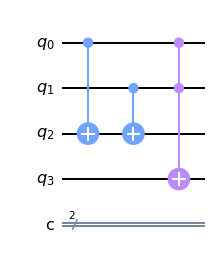

In [8]:
qc = QuantumCircuit(4, 2)
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)
qc.draw('mpl')

Теперь у нас есть наш половинный сумматор, следующее, что нужно сделать, это проверить, что он работает. Для этого мы создадим еще одну схему, которая кодирует некоторые входные данные, применяет полусумматор и извлекает выходные данные.

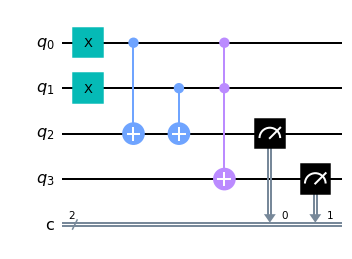

In [9]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11') \ Во-первых, наша схема должна кодировать вход (здесь «11»)
test_qc.x(0)
test_qc.x(1) # меняем значение кубитов с 0 на 1

# Next, it should carry out the adder circuit we created \ Далее он должен выполнять созданную нами схему сумматора
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output \ Наконец, мы измерим два нижних кубита, чтобы извлечь результат
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw('mpl')

In [10]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

Убеждаемся, что схема полусумматора работает для всех четырех возможных входов

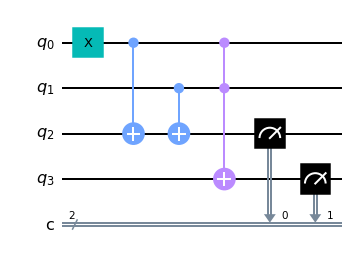

In [15]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11') \ Во-первых, наша схема должна кодировать вход (здесь «11»)
test_qc.x(0)
#test_qc.x(1) # меняем значение кубитов с 0 на 1

# Next, it should carry out the adder circuit we created \ Далее он должен выполнять созданную нами схему сумматора
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output \ Наконец, мы измерим два нижних кубита, чтобы извлечь результат
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw('mpl')

In [14]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'01': 1024}

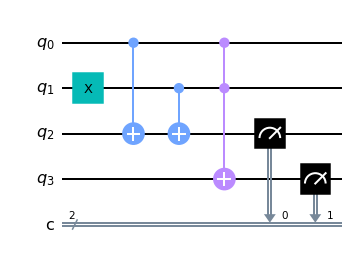

In [16]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11') \ Во-первых, наша схема должна кодировать вход (здесь «11»)
#test_qc.x(0)
test_qc.x(1) # меняем значение кубитов с 0 на 1

# Next, it should carry out the adder circuit we created \ Далее он должен выполнять созданную нами схему сумматора
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output \ Наконец, мы измерим два нижних кубита, чтобы извлечь результат
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw('mpl')

In [17]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'01': 1024}

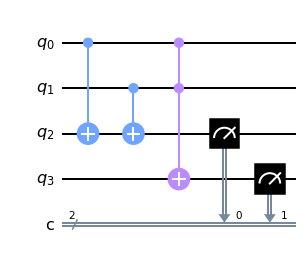

In [18]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11') \ Во-первых, наша схема должна кодировать вход (здесь «11»)
#test_qc.x(0)
#test_qc.x(1) # меняем значение кубитов с 0 на 1

# Next, it should carry out the adder circuit we created \ Далее он должен выполнять созданную нами схему сумматора
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output \ Наконец, мы измерим два нижних кубита, чтобы извлечь результат
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw('mpl')

In [19]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'00': 1024}